In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


In [2]:
from utilityscript2 import *
fn = CommonUtils.get_files()
fn

Directory 'my_dir/neural_net_tuning' does not exist.
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


['/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv',
 '/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv']

In [3]:
len(fn)

2

In [4]:
pd.read_csv(fn[1]).__len__()

30

In [5]:
pd.read_csv(fn[0]).__len__()

30

In [6]:
pd.read_csv(fn[1])

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df = pd.read_csv(fn[0])

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


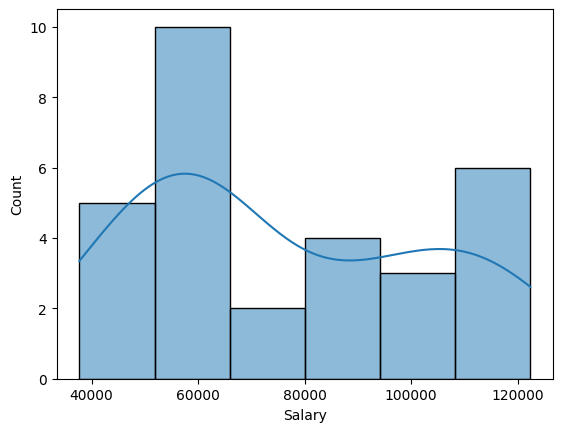

In [8]:
import seaborn as sns

# Histogram plot
sns.histplot(df['Salary'], kde=True)
plt.show()


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


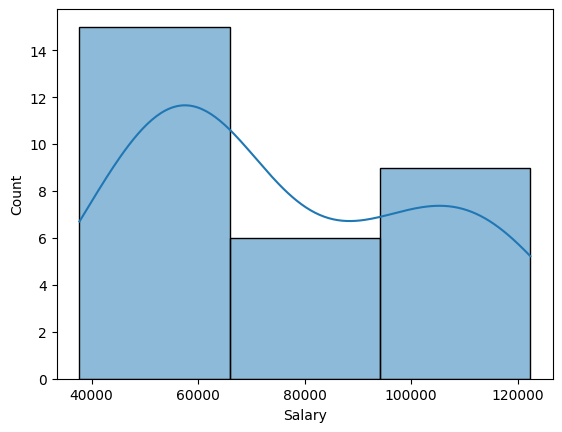

In [9]:
import seaborn as sns

# Histogram plot
sns.histplot(df['Salary'], kde=True, bins=3)
plt.show()


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


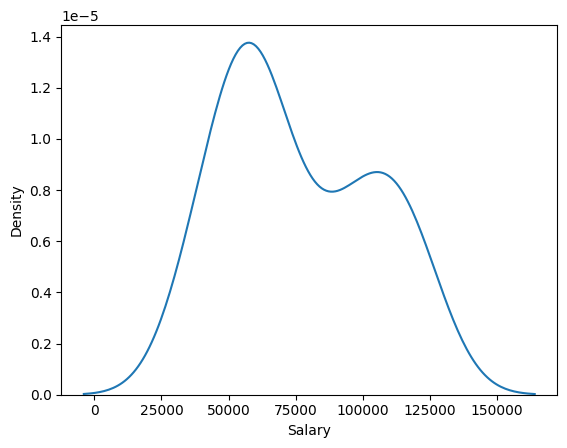

In [10]:
# KDE plot
sns.kdeplot(df['Salary'])
plt.show()


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


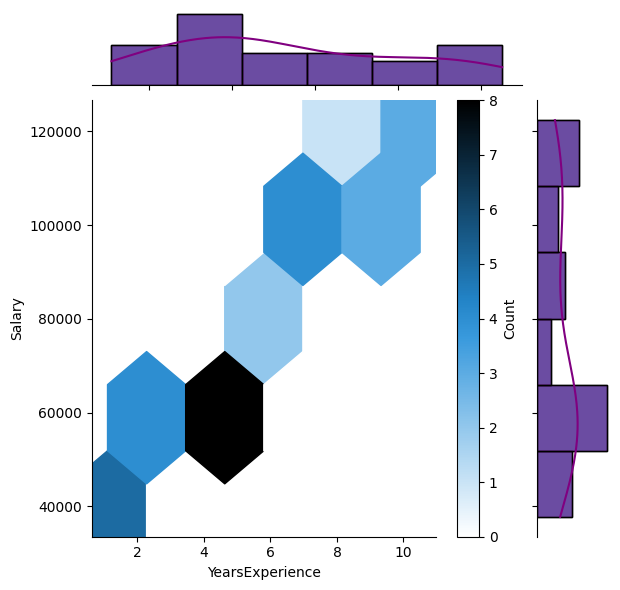

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# data = sns.load_dataset('tips')

# Create a jointplot
g = sns.jointplot(x='YearsExperience', y='Salary', data=df, kind='hex')

# Adding marginal histograms
g.plot_marginals(sns.histplot, kde=True, color='purple')

# Manually add a color bar
cbar = plt.colorbar(g.ax_joint.collections[0], ax=g.ax_joint)
cbar.set_label('Count')

plt.show()


In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

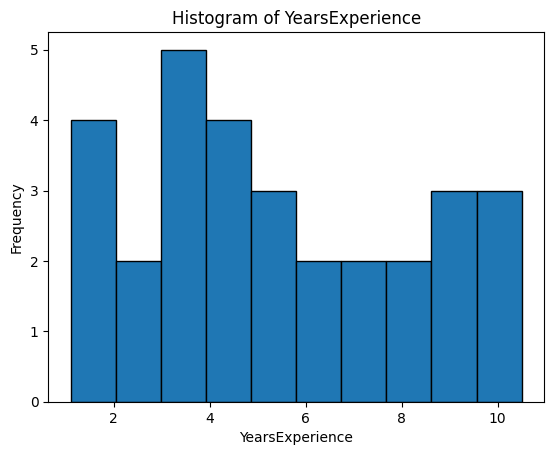

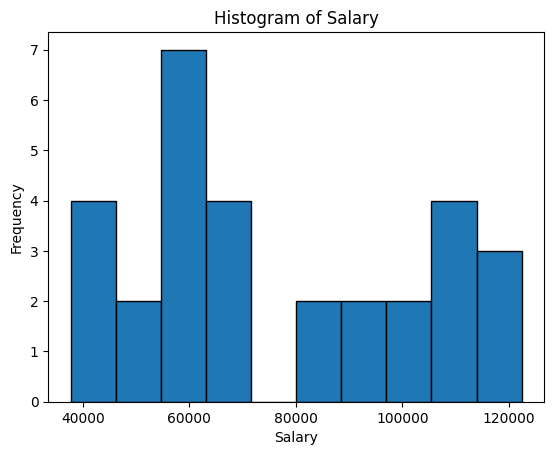

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, kstest

# Create a sample dataframe
# np.random.seed(0)
# data = {'column_name': np.random.normal(0, 1, 1000)}
# df = pd.DataFrame(data)

# Plotting histogram for 'YearsExperience'
plt.hist(df['YearsExperience'], bins=10, edgecolor='black')
plt.title('Histogram of YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Frequency')
plt.show()

# Plotting histogram for 'Salary'
plt.hist(df['Salary'], bins=10, edgecolor='black')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


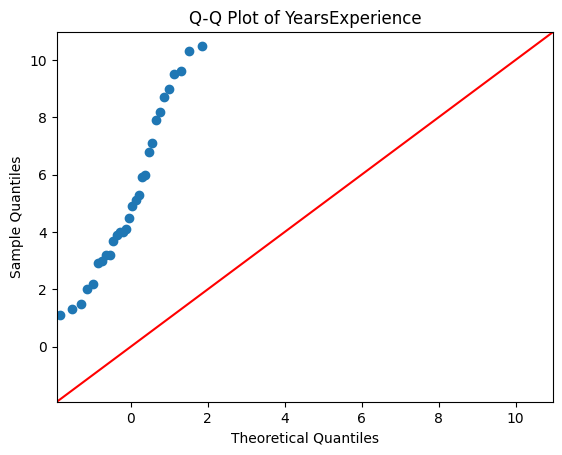

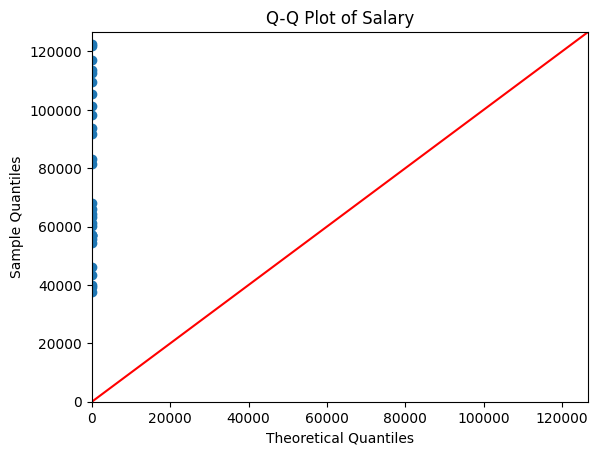

In [15]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Q-Q plot for 'YearsExperience'
sm.qqplot(df['YearsExperience'], line='45')
plt.title('Q-Q Plot of YearsExperience')
plt.show()

# Q-Q plot for 'Salary'
sm.qqplot(df['Salary'], line='45')
plt.title('Q-Q Plot of Salary')
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'target' is your target column
X = df.drop('Salary', axis=1)
y = df['Salary']

# First split: train and temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4,
                                                    random_state=42,)

# Second split: test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (18, 1), (18,)
Validation set: (6, 1), (6,)
Test set: (6, 1), (6,)


In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# List of regressors
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    XGBRegressor()
]

# Dictionary to store results
results = {}

# Loop through regressors
for regressor in regressors:
    regressor_name = regressor.__class__.__name__
    regressor.fit(X_train, y_train)
    score = regressor.score(X_val, y_val)
    results[regressor_name] = score

# Print results
for regressor_name, score in results.items():
    print(f"{regressor_name}: {score:.4f}")


LinearRegression: 0.9572
Ridge: 0.9562
Lasso: 0.9572
ElasticNet: 0.9451
SVR: -0.0615
DecisionTreeRegressor: 0.9538
RandomForestRegressor: 0.9667
GradientBoostingRegressor: 0.9541
KNeighborsRegressor: 0.9476
AdaBoostRegressor: 0.9685
XGBRegressor: 0.9587


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and 'target' is your target column
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
df['Salary_scaled'] = scaler.fit_transform(df[['Salary']])
df['Years_scaled'] = scaler.fit_transform(df[['YearsExperience']])

# Reshape X to be a 2D array
X = df['Years_scaled'].values.reshape(-1, 1)
y = df['Salary_scaled']

# First split: train and temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# Dictionary to store results
results = {}

# Loop through regressors
for regressor in regressors:
    regressor_name = regressor.__class__.__name__
    
    regressor.fit(X_train, y_train)
    score = regressor.score(X_val, y_val)
    results[regressor_name] = score

# Print results
for regressor_name, score in results.items():
    print(f"{regressor_name}: {score:.4f}")


Train set: (18, 1), (18,)
Validation set: (6, 1), (6,)
Test set: (6, 1), (6,)
LinearRegression: 0.9572
Ridge: 0.7683
Lasso: -0.0239
ElasticNet: -0.0239
SVR: 0.9461
DecisionTreeRegressor: 0.9538
RandomForestRegressor: 0.9700
GradientBoostingRegressor: 0.9541
KNeighborsRegressor: 0.9476
AdaBoostRegressor: 0.9640
XGBRegressor: 0.9591
